## Obtain the IMDB Review data

In [1]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words = 10000)
train_data[0][:10]

17465344/17464789 [==============================] - 0s 0us/step


[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]

## Explore the data

In [2]:
print("Shape of the training data: {}".format(train_data.shape))
print("Shape of the testing data: {}".format(test_data.shape))


Shape of the training data: (25000,)
Shape of the testing data: (25000,)


## Description of the data
* The train_data and test_data is a series of reviews; each review is a list of word indices. train_labels and test_labels are list of 0s and 1s where 0 stands for negative and 1 stands for positive

In [3]:
print("First review in training data:{}".format(train_data[0][:10]))
print(train_labels[0])

First review in training data:[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65]
1


## Decoding the first review from integers to words

In [4]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decode_review = ' '.join(
    [reverse_word_index.get(i-3, '?') for i in train_data[0]])
decode_review

1646592/1641221 [==============================] - 0s 0us/step


"? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for what they have done don't you th

## Preparing the data
* You can't feed list of integers into a neural network. You have to turn your list into tensors. One way to do that is to encode the integer sequences into a binary matrix

In [0]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences), dimension))
  for i, sequence in enumerate(sequences):
    results[i, sequence] = 1
  return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [6]:
x_train[0], train_labels

(array([0., 1., 1., ..., 0., 0., 0.]), array([1, 0, 0, ..., 0, 1, 0]))

## Vectorize the labels

In [0]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [8]:
y_train

array([1., 0., 0., ..., 0., 1., 0.], dtype=float32)

## Build your architecture
* This is where we specify the layers of the network.
* The number of hidden units within each layer and the activation function

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(16, activation = 'relu', input_shape = (10000,)))
model.add(Dense(16, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

## Compiling the model
* This is where we specify the optimizer (how the network will update the weight)
* The loss function (a measure of the performance of the network)
* An accuracy (metric to monitor)

In [0]:
model.compile(optimizer = 'rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

## Validating your approach
* We will set apart 10000 samples from the training data to validate our model so that we can have an idea how our model will perform on new unseen data.

In [0]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

## Training the model
* We fit the model on the partial training set and validate on the validation set.
* We specify the epochs(the number of iteration on all training samples)
* We also specify the batch_size (a subset of the training samples to train at a single instance)

In [20]:
history = model.fit(partial_x_train, partial_y_train, epochs = 20, batch_size = 512,
          validation_data = (x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 8s 543us/sample - loss: 0.5098 - acc: 0.7880 - val_loss: 0.3854 - val_acc: 0.8689
Epoch 2/20
15000/15000 [==============================] - 2s 101us/sample - loss: 0.3015 - acc: 0.9027 - val_loss: 0.2967 - val_acc: 0.8893
Epoch 3/20
15000/15000 [==============================] - 2s 101us/sample - loss: 0.2174 - acc: 0.9265 - val_loss: 0.2759 - val_acc: 0.8922
Epoch 4/20
15000/15000 [==============================] - 2s 101us/sample - loss: 0.1745 - acc: 0.9417 - val_loss: 0.2760 - val_acc: 0.8895
Epoch 5/20
15000/15000 [==============================] - 2s 100us/sample - loss: 0.1393 - acc: 0.9550 - val_loss: 0.3323 - val_acc: 0.8717
Epoch 6/20
15000/15000 [==============================] - 1s 100us/sample - loss: 0.1165 - acc: 0.9643 - val_loss: 0.2938 - val_acc: 0.8860
Epoch 7/20
15000/15000 [==============================] - 2s 100us/sample - loss: 0.0984 - acc: 0.9705 - val_l

In [21]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

## Plotting the training and validation loss

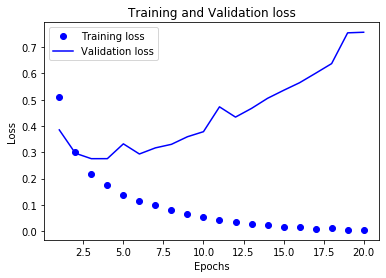

In [27]:
import matplotlib.pyplot as plt

loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']
epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, loss_values, 'bo', label = 'Training loss')
plt.plot(epochs, val_loss_values, 'b', label = 'Validation loss')
plt.legend()
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

## Plotting the training and validation accuracy

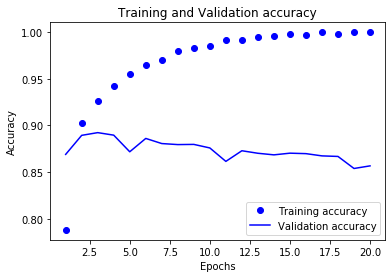

In [29]:
accuracy = history_dict['acc']
val_accuracy = history_dict['val_acc']

epochs = range(1, len(history_dict['acc']) + 1)
plt.plot(epochs, accuracy, 'bo', label = 'Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label = 'Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()